# Random Forest Classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.set_option('display.max_columns',300)

In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.set_index('id',inplace=True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(569, 31)

In [14]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [15]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

### Splitting into features and target sets

In [16]:
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

### Splitting into train and test sets

In [17]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

### Random Forest Classifier

In [18]:
model_rf=RandomForestClassifier(random_state=40)

In [19]:
model_rf.fit(Xtrain,ytrain)

RandomForestClassifier(random_state=40)

In [20]:
train_pred=model_rf.predict(Xtrain)

In [21]:
test_pred=model_rf.predict(Xtest)

In [22]:
print("Training Accuracy:",f1_score(ytrain,train_pred))
print("Test Accuracy:",f1_score(ytest,test_pred))

Training Accuracy: 1.0
Test Accuracy: 0.96


In [23]:
cm_train=confusion_matrix(ytrain,train_pred)
cm_test=confusion_matrix(ytest,test_pred)

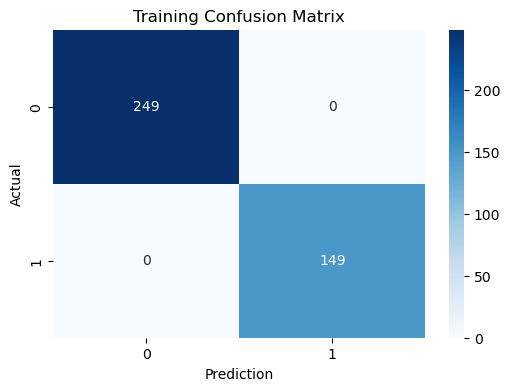

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_train,annot=True,cmap='Blues',fmt='d')
plt.title('Training Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

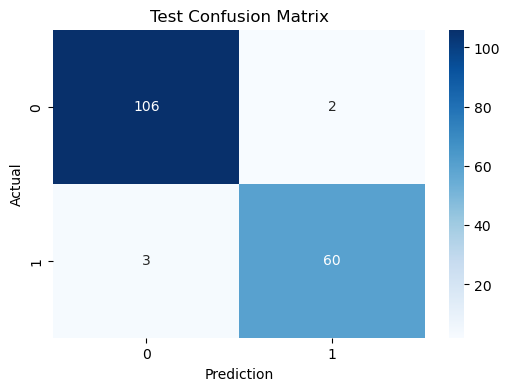

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_test,annot=True,cmap='Blues',fmt='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [26]:
(df.diagnosis.value_counts()/df.shape[:1])*100

diagnosis
0    62.741652
1    37.258348
Name: count, dtype: float64

### Hyper parameter Optimization Using GridSearchCV

In [27]:
import random
import warnings
warnings.filterwarnings('ignore')

In [28]:
np.random.seed(40)
param_dist={'max_depth':[2,3,4,5,8], 'bootstrap':[True,False], 'max_features':['auto','sqrt','log2',None], 
            'criterion':['gini','entropy']}
cv_rf=GridSearchCV(model_rf,cv=10,param_grid=param_dist,n_jobs=3)

In [29]:
cv_rf.fit(Xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=40), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [30]:
print("Best parameters using GridSearchCV:",cv_rf.best_params_)

Best parameters using GridSearchCV: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [39]:
model_rf.set_params(bootstrap= True, criterion= 'gini', max_depth= 8, max_features= 'sqrt')

RandomForestClassifier(max_depth=8, n_estimators=15, oob_score=True,
                       random_state=40, warm_start=True)

In [40]:
train_pred_1=model_rf.predict(Xtrain)

In [41]:
test_pred_1=model_rf.predict(Xtest)

In [42]:
print("Training Accuracy:",f1_score(ytrain,train_pred_1))
print("Test Accuracy:",f1_score(ytest,test_pred_1))

Training Accuracy: 1.0
Test Accuracy: 0.96


In [43]:
cm_train_1=confusion_matrix(ytrain,train_pred_1)
cm_test_1=confusion_matrix(ytest,test_pred_1)

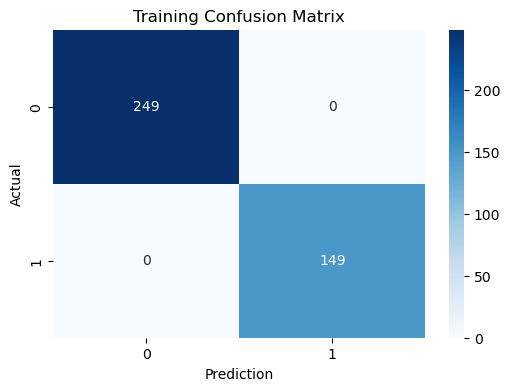

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_train_1,annot=True,cmap='Blues',fmt='d')
plt.title('Training Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

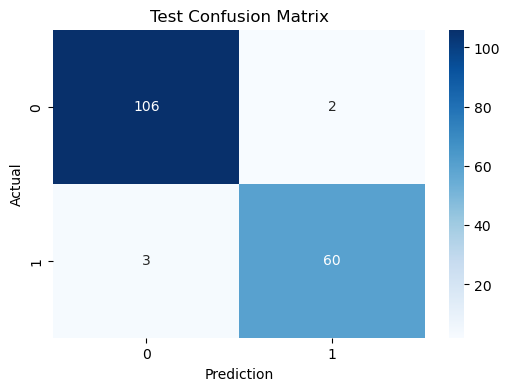

In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_test_1,annot=True,cmap='Blues',fmt='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### OOB Rate

In [48]:
model_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(Xtrain,ytrain)

    oob_error = 1 - model_rf.oob_score_
    error_rate[i] = oob_error

In [49]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 100 to 1000 Trees)')

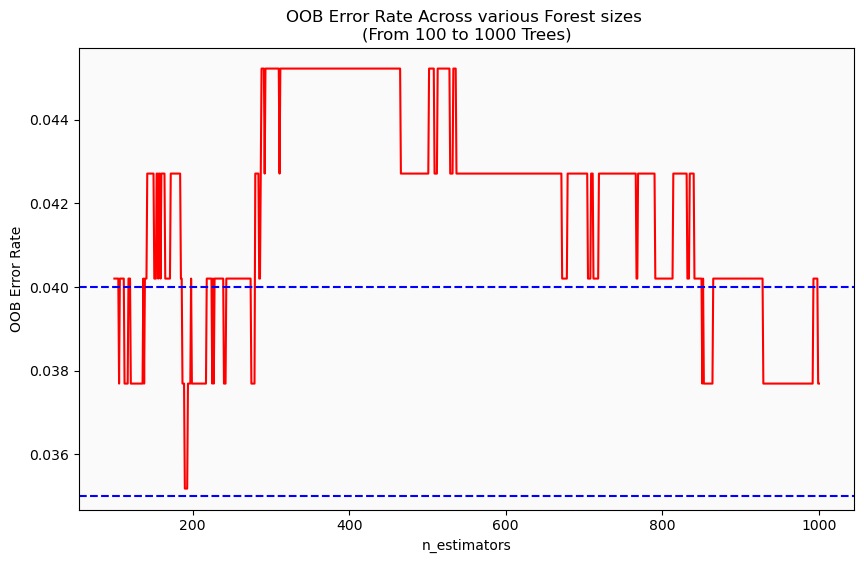

In [51]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.035,color='blue',linestyle='--')
plt.axhline(0.04,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 1000 Trees)')

In [52]:
print('OOB Error rate for 950 trees is: %0.5f'%oob_series[950])

OOB Error rate for 950 trees is: 0.03769


In [53]:
model_rf.set_params(n_estimators=950,bootstrap=True,warm_start=False,oob_score=False)

RandomForestClassifier(max_depth=8, n_estimators=950, random_state=40)

In [54]:
model_rf.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=8, n_estimators=950, random_state=40)

In [56]:
train_pred_2=model_rf.predict(Xtrain)
test_pred_2=model_rf.predict(Xtest)

In [57]:
print("Training Accuracy:",f1_score(ytrain,train_pred_2))
print("Test Accuracy:",f1_score(ytest,test_pred_2))

Training Accuracy: 1.0
Test Accuracy: 0.9516129032258064
